In [ ]:
!pip install kaldiio

In [ ]:
!pip install keras-tuner

In [2]:
import kaldiio
import pandas as pd

temp = []
temp1 = []
dictlist = []
dictlist1 = []
d = kaldiio.load_ark('StressDat_xvector512.ark')  # d is a generator object
for key, numpy_array in d:
#    print(key)
#    print(numpy_array)
    temp = key
    temp1 = numpy_array
    dictlist.append(temp)
    dictlist1.append(temp1)
df = pd.DataFrame(list(zip(dictlist, dictlist1)),
               columns =['FILE', 'features'])

In [3]:
df

,FILE,features
0,s01a_11a_crisis_1_0298,"[0.5722328, -0.5864534, 0.4016994, -0.532431, ..."
1,s01a_11a_crisis_1_0299,"[2.005553, -2.49519, 1.152471, -0.3920052, 1.0..."
2,s01a_11a_crisis_1_0300,"[1.02881, -2.220682, 0.5428701, -0.5339947, 0...."
3,s01a_11a_crisis_1_0301,"[0.4709102, -1.232904, 0.5122496, -0.4609921, ..."
4,s01a_11a_crisis_1_0302,"[1.015653, -1.081361, 0.232879, -0.3884549, 2...."
...,...,...
12809,s29h_9c_crisis_3_0299,"[1.090773, -2.12289, 0.8505183, -0.4234217, -0..."
12810,s29h_9c_crisis_3_0300,"[1.585508, -1.902868, 0.8690134, -0.3821687, -..."
12811,s29h_9c_crisis_3_0301,"[1.538649, -1.610638, 0.3587935, -0.5311078, -..."
12812,s29h_9c_crisis_3_0302,"[0.9480105, -1.187047, 0.9156968, -0.3451743, ..."


In [3]:
df['features'][0]

array([ 5.722328e-01, -5.864534e-01,  4.016994e-01, -5.324310e-01,
        1.213925e+00, -4.061090e-01, -3.072732e-01, -7.375916e-01,
        1.884446e+00,  4.039819e-01,  1.142112e+00, -1.813632e+00,
       -1.358565e-01,  4.084460e-01,  8.180022e-03, -1.043652e+00,
        1.789332e+00,  1.158190e+00, -1.128198e+00, -1.245530e+00,
        6.612571e-01, -2.477030e-01,  2.289907e+00,  4.576121e-01,
       -4.807441e-01,  9.407710e-01, -4.929501e-01,  6.233194e-01,
        3.003048e-01, -2.441026e-01,  1.661693e+00,  1.086501e+00,
        1.316072e+00, -2.465368e-03, -1.317744e+00, -6.016899e-01,
        1.490715e+00,  8.050655e-01, -3.880918e-02,  1.958017e+00,
        5.184799e-01,  4.137702e-01, -6.709865e-01, -6.479348e-01,
       -1.311020e+00,  6.796974e-02, -2.334705e-01, -5.004630e-01,
       -1.161196e+00, -8.000428e-01,  1.872293e+00,  3.460898e-01,
        6.843317e-01,  1.680499e+00,  3.696207e-01, -1.553014e+00,
       -5.100275e-01, -4.894818e-01,  1.283841e+00,  1.053119e

In [4]:
import pandas as pd
import os
import librosa
import numpy as np
audio_dataset_path=r'C:\Users\Jay Kejriwal\Desktop\Jay\StressDat'
header_list = ["FILE", "Annotators", "SCORE"]
metadata=pd.read_csv(r'C:\Users\Jay Kejriwal\Desktop\Jay\StressDat\StressDat-anotacia-29spk_v1_normalize_all_scores.txt',sep="\t",names=header_list)
conditions = [
    (metadata['SCORE'] <= 20),
    (metadata['SCORE'] > 20) & (metadata['SCORE'] <= 40),
    (metadata['SCORE'] > 40)
    ]

# create a list of the values we want to assign for each condition
values = ['low', 'med', 'high']

# create a new column and use np.select to assign values to it using our lists as arguments
metadata['SCALE'] = np.select(conditions, values)
# display updated DataFrame
metadata.head()

,FILE,Annotators,SCORE,SCALE
0,s06h_10b_crisis_2_0315,2,28.846021,med
1,s01a_6b_crisis_2_0170,2,32.322045,med
2,s07n_8a_crisis_1_0244,1,17.074338,low
3,s06h_9b_crisis_2_0284,2,43.659132,high
4,s07n_6a_crisis_1_0180,1,11.215002,low


In [4]:
metadata=pd.read_csv(r'C:\Users\Jay Kejriwal\Desktop\Jay\StressDat\modified.csv',sep="\t")

metadata.rename(columns={'V1': 'FILE', 'V2': 'Annotators', 'V3': 'SCORE'}, inplace=True)
# display updated DataFrame
metadata.head()

,FILE,Annotators,SCORE,SCALE
0,s06h_10b_crisis_2_0315,2,28.846021,Medium
1,s01a_6b_crisis_2_0170,2,32.322045,Medium
2,s07n_8a_crisis_1_0244,1,17.074338,Medium
3,s06h_9b_crisis_2_0284,2,43.659132,High
4,s03a_9a_crisis_1_0274,1,27.351947,Medium


In [5]:
import pandas as pd
X1= pd.merge(metadata, df, on='FILE', how='inner')

In [6]:
X1

,FILE,Annotators,SCORE,SCALE,features
0,s06h_10b_crisis_2_0315,2,28.846021,Medium,"[1.384207, 0.6185268, -1.668165, -0.3523142, 0..."
1,s01a_6b_crisis_2_0170,2,32.322045,Medium,"[0.8190287, -2.32593, -0.1740024, -0.3395131, ..."
2,s07n_8a_crisis_1_0244,1,17.074338,Medium,"[0.511696, 0.1088789, -1.544156, -0.6499531, 0..."
3,s06h_9b_crisis_2_0284,2,43.659132,High,"[2.221089, 0.8119178, -1.537307, -0.5036674, 0..."
4,s03a_9a_crisis_1_0274,1,27.351947,Medium,"[0.4488477, 0.7557455, -1.490509, -0.8269888, ..."
...,...,...,...,...,...
12784,s29h_18a_crisis_1_0493,1,11.326830,Low,"[0.6290638, -2.306679, 0.6345231, -0.312473, -..."
12785,s27h_19a_crisis_1_0537,1,5.753345,Low,"[1.2397, -1.037196, 0.4464797, -0.3504595, -0...."
12786,s26h_16b_crisis_2_0444,2,32.758280,Medium,"[0.7678525, 1.456382, -0.9380628, -0.7516432, ..."
12787,s25h_19a_crisis_1_0526,1,5.866519,Low,"[1.230789, -0.1738276, -0.3944657, -0.2502984,..."


In [7]:
extracted_features_df = X1[["SCALE","features"]]
extracted_features_df.columns=['class_label','feature']
extracted_features_df.to_pickle("newxvector_features512_1D.pkl",protocol=4)

In [ ]:
extracted_features_df.to_csv(r"D:\j111.csv", index=False,sep=';')

In [15]:
extracted_features_df['feature'].dtype

dtype('O')

In [18]:
extracted_features_df['feature'][0]

array([ 1.384207  ,  0.6185268 , -1.668165  , -0.3523142 ,  0.8683042 ,
       -1.108394  , -0.3603082 , -0.8947257 , -1.684454  , -1.1855    ,
       -0.4131489 , -0.8488714 ,  0.4545313 ,  1.058568  ,  1.20606   ,
        0.3362907 , -0.9347032 ,  0.2250484 , -1.098781  , -2.151877  ,
        0.9154546 , -0.2313002 , -0.1204657 ,  0.6999055 , -1.681165  ,
        0.5176618 ,  0.6816418 ,  2.448103  ,  0.6109436 ,  1.005803  ,
        0.5958276 ,  0.5392126 ,  0.5262791 ,  1.25829   , -1.119233  ,
       -0.9483609 , -2.03435   ,  1.153052  ,  1.16858   ,  0.0642302 ,
       -2.223293  ,  1.443395  , -0.6524087 , -0.6485407 , -0.09221102,
        0.03628117,  0.2939738 ,  0.1864458 ,  0.6499427 ,  0.7516132 ,
        1.881889  , -2.362291  , -3.796108  , -1.074712  , -0.9332991 ,
        0.3435362 , -0.7488071 , -0.679899  , -1.876489  ,  0.933697  ,
        0.06523918,  0.6025363 ,  1.145786  ,  2.21687   , -0.560503  ,
       -2.493037  ,  0.3860781 , -2.580408  , -0.5551303 , -1.00

In [7]:
import numpy as np
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [8]:
X.shape

(12789, 512)

In [9]:
y.shape

(12789,)

In [10]:
y

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Low', 'High'],
      dtype='<U6')

In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=np.array(extracted_features_df['class'].tolist())
y=to_categorical(labelencoder.fit_transform(y))

In [12]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [15]:
### No of classes
num_labels=y.shape[1]

In [16]:

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(512,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [18]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
320/320 [==============================] - 5s 11ms/step - loss: 1.0887 - accuracy: 0.4850 - val_loss: 0.6240 - val_accuracy: 0.7174

Epoch 00001: val_loss improved from inf to 0.62397, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
320/320 [==============================] - 1s 4ms/step - loss: 0.6805 - accuracy: 0.6728 - val_loss: 0.6071 - val_accuracy: 0.7271

Epoch 00002: val_loss improved from 0.62397 to 0.60708, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
320/320 [==============================] - 1s 4ms/step - loss: 0.6430 - accuracy: 0.6992 - val_loss: 0.5613 - val_accuracy: 0.7334

Epoch 00003: val_loss improved from 0.60708 to 0.56126, saving model to saved_models\audio_classification.hdf5
Epoch 4/100
320/320 [==============================] - 3s 8ms/step - loss: 0.6111 - accuracy: 0.7164 - val_loss: 0.5571 - val_accuracy: 0.7568

Epoch 00004: val_loss improved from 0.56126 to 0.55715, saving model to saved_models\audio_cla

320/320 [==============================] - 2s 6ms/step - loss: 0.4235 - accuracy: 0.8206 - val_loss: 0.5069 - val_accuracy: 0.7862

Epoch 00082: val_loss did not improve from 0.49594
Epoch 83/100
320/320 [==============================] - 3s 9ms/step - loss: 0.4271 - accuracy: 0.8136 - val_loss: 0.5370 - val_accuracy: 0.7721

Epoch 00083: val_loss did not improve from 0.49594
Epoch 84/100
320/320 [==============================] - 2s 8ms/step - loss: 0.4291 - accuracy: 0.8099 - val_loss: 0.5157 - val_accuracy: 0.7811

Epoch 00084: val_loss did not improve from 0.49594
Epoch 85/100
320/320 [==============================] - 1s 4ms/step - loss: 0.4163 - accuracy: 0.8235 - val_loss: 0.5308 - val_accuracy: 0.7826

Epoch 00085: val_loss did not improve from 0.49594
Epoch 86/100
320/320 [==============================] - 2s 7ms/step - loss: 0.4206 - accuracy: 0.8181 - val_loss: 0.5249 - val_accuracy: 0.7830

Epoch 00086: val_loss did not improve from 0.49594
Epoch 87/100
320/320 [===========

In [19]:
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(train_accuracy[1])
print(test_accuracy[1])
#New dataset
#0.8482064604759216
#0.784988284111023

#Old dataset
#0.8511364459991455
#0.7943815588951111

0.8482064604759216
0.784988284111023


In [ ]:
###########CNN

In [20]:
import numpy as np
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [21]:
X.shape


(12789, 512)

In [22]:
y.shape

(12789,)

In [23]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=np.array(extracted_features_df['class'].tolist())
y=to_categorical(labelencoder.fit_transform(y))

In [24]:
y.shape

(12789, 3)

In [26]:
### Train Test Split
num_classes = 3;

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
Y_train_ann_cnn = y_train
Y_test_ann_cnn = y_test

print(Y_train_ann_cnn.shape,Y_test_ann_cnn.shape,X_train_cnn.shape,X_test_cnn.shape)


(10231, 3) (2558, 3) (10231, 512, 1) (2558, 512, 1)


In [27]:
from tensorflow.keras.layers import Convolution1D, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Convolution1D, MaxPooling1D

In [28]:
model = Sequential()
model.add(Conv1D(filters=16, input_shape=X_train_cnn.shape[1:], kernel_size=2, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=32, kernel_size=2, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=128, kernel_size=2, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
#model.add(GlobalAveragePooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))



print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 16)           48        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 256, 16)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 256, 32)           1056      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 128, 32)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 128, 64)          

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train_cnn, Y_train_ann_cnn, batch_size=num_batch_size, epochs=num_epochs, 
                   validation_data=(X_test_cnn, Y_test_ann_cnn), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

#94
#80


Epoch 1/100
320/320 [==============================] - 19s 52ms/step - loss: 1.0849 - accuracy: 0.3811 - val_loss: 0.7235 - val_accuracy: 0.6513

Epoch 00001: val_loss improved from inf to 0.72350, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
320/320 [==============================] - 16s 50ms/step - loss: 0.7796 - accuracy: 0.6202 - val_loss: 0.6484 - val_accuracy: 0.7091

Epoch 00002: val_loss improved from 0.72350 to 0.64838, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
320/320 [==============================] - 16s 49ms/step - loss: 0.7132 - accuracy: 0.6705 - val_loss: 0.6076 - val_accuracy: 0.7232

Epoch 00003: val_loss improved from 0.64838 to 0.60764, saving model to saved_models\audio_classification.hdf5
Epoch 4/100
320/320 [==============================] - 17s 52ms/step - loss: 0.6819 - accuracy: 0.6757 - val_loss: 0.6042 - val_accuracy: 0.7256

Epoch 00004: val_loss improved from 0.60764 to 0.60419, saving model to saved_models\au

320/320 [==============================] - 10s 31ms/step - loss: 0.3959 - accuracy: 0.8275 - val_loss: 0.5301 - val_accuracy: 0.7740

Epoch 00078: val_loss did not improve from 0.51174
Epoch 79/100
320/320 [==============================] - 10s 31ms/step - loss: 0.3792 - accuracy: 0.8387 - val_loss: 0.5263 - val_accuracy: 0.7772

Epoch 00079: val_loss did not improve from 0.51174
Epoch 80/100
320/320 [==============================] - 10s 31ms/step - loss: 0.4008 - accuracy: 0.8273 - val_loss: 0.5422 - val_accuracy: 0.7674

Epoch 00080: val_loss did not improve from 0.51174
Epoch 81/100
320/320 [==============================] - 10s 31ms/step - loss: 0.3813 - accuracy: 0.8397 - val_loss: 0.5327 - val_accuracy: 0.7654

Epoch 00081: val_loss did not improve from 0.51174
Epoch 82/100
320/320 [==============================] - 10s 31ms/step - loss: 0.3828 - accuracy: 0.8351 - val_loss: 0.5249 - val_accuracy: 0.7787

Epoch 00082: val_loss did not improve from 0.51174
Epoch 83/100
320/320 [=

In [31]:
train_accuracy=model.evaluate(X_train_cnn,Y_train_ann_cnn,verbose=0)
test_accuracy=model.evaluate(X_test_cnn,Y_test_ann_cnn,verbose=0)
print(train_accuracy[1])
print(test_accuracy[1])

#Accuracy on new dataset
#0.9451666474342346
#0.7638780474662781

0.9451666474342346
0.7638780474662781


In [ ]:
#Keras Tuner for auto tuning

In [32]:
from kerastuner import RandomSearch
import keras_tuner
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras

<ipython-input-32-503a2fbf775d>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [33]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [2,5]),
        activation='relu',
        input_shape=X_train_cnn.shape[1:]
    ),
    keras.layers.Conv1D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [2,5]),
        activation='relu'
    ),

    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=256, step=16),
        activation='relu'
    ),
    keras.layers.Dense(num_classes, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [36]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Stress_clasification_CNN4")

In [37]:
tuner_search.search(X_train_cnn, Y_train_ann_cnn, epochs=3,validation_split=0.2)

Trial 5 Complete [00h 00m 49s]
val_accuracy: 0.33365902304649353

Best val_accuracy So Far: 0.7757694125175476
Total elapsed time: 00h 04m 01s
INFO:tensorflow:Oracle triggered exit


In [38]:
model=tuner_search.get_best_models(num_models=1)[0]

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 511, 64)           192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 510, 64)           8256      
_________________________________________________________________
flatten (Flatten)            (None, 32640)             0         
_________________________________________________________________
dense (Dense)                (None, 176)               5744816   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 531       
Total params: 5,753,795
Trainable params: 5,753,795
Non-trainable params: 0
_________________________________________________________________


In [42]:
history=model.fit(X_train_cnn, Y_train_ann_cnn, epochs=10, validation_split=0.2, initial_epoch=3)

Epoch 4/10
256/256 [==============================] - 16s 62ms/step - loss: 0.2614 - accuracy: 0.8905 - val_loss: 0.4939 - val_accuracy: 0.8075
Epoch 5/10
256/256 [==============================] - 16s 63ms/step - loss: 0.2126 - accuracy: 0.9142 - val_loss: 0.5425 - val_accuracy: 0.8012
Epoch 6/10
256/256 [==============================] - 16s 63ms/step - loss: 0.1697 - accuracy: 0.9337 - val_loss: 0.5122 - val_accuracy: 0.8085
Epoch 7/10
256/256 [==============================] - 16s 63ms/step - loss: 0.1358 - accuracy: 0.9460 - val_loss: 0.5969 - val_accuracy: 0.8095
Epoch 8/10
256/256 [==============================] - 16s 63ms/step - loss: 0.1037 - accuracy: 0.9616 - val_loss: 0.7073 - val_accuracy: 0.7885
Epoch 9/10
256/256 [==============================] - 16s 61ms/step - loss: 0.0828 - accuracy: 0.9688 - val_loss: 0.7587 - val_accuracy: 0.8065
Epoch 10/10
256/256 [==============================] - 16s 63ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.8468 - val_accuracy

In [43]:
train_accuracy=model.evaluate(X_train_cnn,Y_train_ann_cnn,verbose=0)
test_accuracy=model.evaluate(X_test_cnn,Y_test_ann_cnn,verbose=0)
print(train_accuracy[1])
print(test_accuracy[1])

#0.9557228088378906
#0.7724785208702087

0.9557228088378906
0.7724785208702087


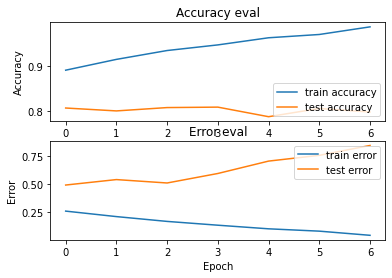

In [45]:
###Check Fitting
import matplotlib.pyplot as plt
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()
plot_history(history)